In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Задача 12
Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [2]:
features = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',\
'Magnesium','Total phenols','Flavanoids',\
'Nonflavanoid phenols','Proanthocyanins','Color intensity', \
'Hue','OD280/OD315 of diluted wines','Proline']

data = pd.read_table(filepath_or_buffer = \
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=',', names = features)

fixed_data = data.drop(labels = 'Type', axis = 1, inplace = False)
fixed_data['Type'] = data['Type']

fixed_data.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(fixed_data.drop(labels='Type', axis = 1), fixed_data['Type'])

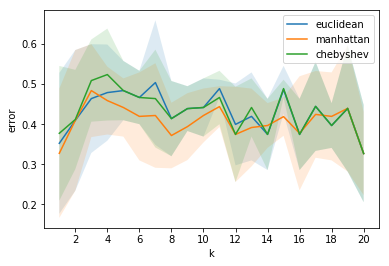

In [4]:
neighbours_factor = range(1, 21)

for metric in ('euclidean', 'manhattan', 'chebyshev'):
    means, std_deviations = [], []
    
    for neighbours in neighbours_factor:
        classifier = KNeighborsClassifier(n_neighbors = neighbours, metric = metric).fit(X_train, y_train)
        scores = cross_val_score(classifier, X_test, y_test, cv = 5)
        
        means.append(scores.mean())
        std_deviations.append(scores.std())
    
    # plot a chart
    errors = 1 - sp.array(means)
    std_deviations = sp.array(std_deviations)
    
    plt.plot(neighbours_factor, errors, label = metric)
    plt.fill_between(neighbours_factor, errors - std_deviations, errors + std_deviations, alpha=0.15)
    
plt.xticks(neighbours_factor[1::2])
plt.xlabel('k')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.savefig(fname='std.png',format='png')
plt.show()